In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import  imread
import cv2
import glob
import os
import pickle
import seaborn as sns

In [2]:
df = pd.read_csv("Feature_vectors_500_1_ (2).csv")

In [3]:
df2 = df.dropna( how = 'all',axis = 1 )

In [4]:
df2

,0,1,2,3,4,5,6,7,8,9,...,493,494,495,496,497,498,499,Image_number,Groups,Classes
0,0.114324,0.028431,0.183857,0.167108,0.111241,-0.090504,-0.085886,0.109298,0.046349,-0.014862,...,-0.330577,-0.537014,0.051348,0.005759,-0.033291,0.333013,0.148066,0,200-300,1
1,0.036536,0.107669,-0.210218,-0.012472,0.072307,0.148539,0.345740,0.022913,0.175509,-0.156027,...,0.029296,-0.337800,0.123646,-0.028666,-0.015259,-0.064168,0.052371,1,200-300,1
2,-0.105260,-0.057414,0.144043,0.129477,-0.060802,-0.205929,-0.381033,-0.173217,-0.209320,0.139787,...,-0.090928,0.363867,-0.198434,0.110269,-0.091106,0.166935,-0.100921,2,200-300,1
3,0.126656,0.002265,0.114690,-0.302026,0.042582,-0.039662,0.120968,0.048458,-0.133306,0.246963,...,-0.052737,-0.027741,0.036589,-0.113104,0.111180,0.177172,0.060268,3,200-300,1
4,0.005338,0.094253,0.271877,-0.516528,0.227165,-0.293491,0.053251,0.466794,-0.032084,0.015470,...,0.401541,-0.182617,0.293287,-0.199172,0.350055,-0.255824,0.053794,4,200-300,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
417,-0.222862,0.057137,-0.063813,0.196426,-0.062430,0.260071,0.156210,0.185050,0.259993,0.050590,...,-0.060812,0.058529,0.236328,-0.115495,-0.170756,0.430510,-0.164610,417,100-200,1
418,-0.101527,0.122667,-0.006195,0.225685,-0.186318,-0.393274,-0.115552,-0.003258,-0.085611,-0.029658,...,-0.335288,0.168079,-0.414221,0.359639,-0.208078,0.484441,-0.003273,418,100-200,1
419,-0.090186,0.828737,-0.918990,0.117100,-0.025704,-0.120165,-0.050376,-0.161939,-0.361775,-0.152718,...,-0.634397,-0.016138,-0.070177,0.406868,-0.089467,0.117823,-0.023597,419,100-200,1
420,-0.051800,-0.108122,-0.099604,0.064538,-0.129158,0.026099,-0.037415,-0.237302,-0.066587,0.006191,...,0.043235,0.011707,-0.215798,-0.020732,0.149412,0.035150,0.027884,420,100-200,1


In [5]:
df2['Classes'].value_counts()

0    237
1    185
Name: Classes, dtype: int64

In [6]:
y = df2['Classes']
y

0      1
1      1
2      1
3      1
4      1
      ..
417    1
418    1
419    1
420    1
421    1
Name: Classes, Length: 422, dtype: int64

In [7]:
X_i = df2.drop(labels = ['Groups','Image_number','Classes'],  axis = 1)

In [8]:
X_i


,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,0.114324,0.028431,0.183857,0.167108,0.111241,-0.090504,-0.085886,0.109298,0.046349,-0.014862,...,-0.054045,-0.036205,-0.019211,-0.330577,-0.537014,0.051348,0.005759,-0.033291,0.333013,0.148066
1,0.036536,0.107669,-0.210218,-0.012472,0.072307,0.148539,0.345740,0.022913,0.175509,-0.156027,...,-0.217404,-0.124158,0.041486,0.029296,-0.337800,0.123646,-0.028666,-0.015259,-0.064168,0.052371
2,-0.105260,-0.057414,0.144043,0.129477,-0.060802,-0.205929,-0.381033,-0.173217,-0.209320,0.139787,...,0.274581,0.121665,-0.055106,-0.090928,0.363867,-0.198434,0.110269,-0.091106,0.166935,-0.100921
3,0.126656,0.002265,0.114690,-0.302026,0.042582,-0.039662,0.120968,0.048458,-0.133306,0.246963,...,-0.031867,0.159982,-0.239607,-0.052737,-0.027741,0.036589,-0.113104,0.111180,0.177172,0.060268
4,0.005338,0.094253,0.271877,-0.516528,0.227165,-0.293491,0.053251,0.466794,-0.032084,0.015470,...,0.095621,0.087125,-0.553311,0.401541,-0.182617,0.293287,-0.199172,0.350055,-0.255824,0.053794
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
417,-0.222862,0.057137,-0.063813,0.196426,-0.062430,0.260071,0.156210,0.185050,0.259993,0.050590,...,0.222909,-0.371705,0.346564,-0.060812,0.058529,0.236328,-0.115495,-0.170756,0.430510,-0.164610
418,-0.101527,0.122667,-0.006195,0.225685,-0.186318,-0.393274,-0.115552,-0.003258,-0.085611,-0.029658,...,0.034220,0.154589,-0.212613,-0.335288,0.168079,-0.414221,0.359639,-0.208078,0.484441,-0.003273
419,-0.090186,0.828737,-0.918990,0.117100,-0.025704,-0.120165,-0.050376,-0.161939,-0.361775,-0.152718,...,0.070761,0.010299,-0.013057,-0.634397,-0.016138,-0.070177,0.406868,-0.089467,0.117823,-0.023597
420,-0.051800,-0.108122,-0.099604,0.064538,-0.129158,0.026099,-0.037415,-0.237302,-0.066587,0.006191,...,-0.232427,-0.089418,0.199870,0.043235,0.011707,-0.215798,-0.020732,0.149412,0.035150,0.027884


In [9]:
X = X_i.dropna( how = 'all',axis = 1 )

In [10]:
df = pd.read_csv("Feature_vectors (2).csv")

In [11]:
df2 = df.dropna( how = 'all',axis = 1 )

In [13]:
df2['classes'].value_counts()

2    113
3    111
1     90
6     85
5     29
4     25
Name: classes, dtype: int64

In [14]:
y = df2['classes']
y

0      1
1      2
2      3
3      4
4      5
      ..
448    2
449    3
450    2
451    3
452    2
Name: classes, Length: 453, dtype: int64

In [15]:
X_i = df.drop(labels = ['P_Class','Image_number','classes'],  axis = 1)

In [16]:
X_i

,0,1,2,3,4,5,6,7,8,9,...,241,242,243,244,245,246,247,248,249,Unnamed: 251
0,-0.311141,0.006895,-0.028155,-0.227891,-0.119999,0.010017,-0.264298,0.251731,-0.021813,-0.310622,...,-0.014105,0.008812,0.027828,-0.002671,0.003276,-0.804431,0.039347,0.256016,0.098443,NaN
1,0.015626,0.044093,-0.020260,0.007021,-0.210146,-0.167425,-0.011263,0.206375,0.037094,-0.110348,...,0.024780,-0.207046,-0.124031,-0.350980,0.063079,-0.054837,0.014232,0.326645,0.138640,NaN
2,0.092745,-0.009331,0.020872,-0.028204,0.021076,0.025976,0.236509,-0.096335,-0.369392,0.131914,...,0.083093,-1.106135,-0.271095,-0.143762,-0.214074,0.119884,0.058082,1.003388,-0.683336,NaN
3,0.717302,-0.147042,0.375752,0.118291,-0.309302,0.025332,-0.873378,-0.245396,-0.695048,0.038182,...,-0.520945,-0.136670,-0.191544,0.204389,0.294729,0.472251,0.378420,0.272662,-0.669480,NaN
4,2.305410,4.915289,-1.765068,2.106916,1.071117,1.489921,1.349525,-11.377551,-0.420624,1.571269,...,1.351090,3.208038,2.358281,2.456605,3.261353,5.036321,-2.695583,-2.224470,-8.670266,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
448,-0.048565,-0.061285,-0.022439,-0.023099,-0.268095,0.021224,-0.029522,0.308217,0.249719,-0.028685,...,-0.351909,0.064735,0.044592,0.000378,-0.090520,-0.099178,0.475908,0.025061,0.279071,NaN
449,-0.055985,-0.273783,-0.013988,0.194649,-0.000422,-0.000910,0.196862,0.010306,0.055138,0.019298,...,-0.003517,0.020292,0.236934,-0.095758,0.057123,0.039792,0.077281,0.031965,-0.106260,NaN
450,0.081564,0.016305,0.112847,-0.256265,-0.012582,-0.432136,0.523490,-0.079027,-0.429400,0.189658,...,0.006434,-0.243780,-0.292262,-0.119115,-0.486447,0.161060,0.030196,0.187469,-0.864281,NaN
451,0.824391,0.053215,-0.005661,-0.005195,-0.049582,-0.374388,0.054491,-0.086159,-0.463141,0.235781,...,0.005193,-0.235493,-0.338410,-0.138606,-0.065817,0.158400,0.063669,1.026848,-0.932690,NaN


In [17]:
X = X_i.dropna( how = 'all',axis = 1 )

In [18]:
X

,0,1,2,3,4,5,6,7,8,9,...,240,241,242,243,244,245,246,247,248,249
0,-0.311141,0.006895,-0.028155,-0.227891,-0.119999,0.010017,-0.264298,0.251731,-0.021813,-0.310622,...,-0.222388,-0.014105,0.008812,0.027828,-0.002671,0.003276,-0.804431,0.039347,0.256016,0.098443
1,0.015626,0.044093,-0.020260,0.007021,-0.210146,-0.167425,-0.011263,0.206375,0.037094,-0.110348,...,-0.260282,0.024780,-0.207046,-0.124031,-0.350980,0.063079,-0.054837,0.014232,0.326645,0.138640
2,0.092745,-0.009331,0.020872,-0.028204,0.021076,0.025976,0.236509,-0.096335,-0.369392,0.131914,...,-0.537021,0.083093,-1.106135,-0.271095,-0.143762,-0.214074,0.119884,0.058082,1.003388,-0.683336
3,0.717302,-0.147042,0.375752,0.118291,-0.309302,0.025332,-0.873378,-0.245396,-0.695048,0.038182,...,-0.216817,-0.520945,-0.136670,-0.191544,0.204389,0.294729,0.472251,0.378420,0.272662,-0.669480
4,2.305410,4.915289,-1.765068,2.106916,1.071117,1.489921,1.349525,-11.377551,-0.420624,1.571269,...,12.894407,1.351090,3.208038,2.358281,2.456605,3.261353,5.036321,-2.695583,-2.224470,-8.670266
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
448,-0.048565,-0.061285,-0.022439,-0.023099,-0.268095,0.021224,-0.029522,0.308217,0.249719,-0.028685,...,-0.374786,-0.351909,0.064735,0.044592,0.000378,-0.090520,-0.099178,0.475908,0.025061,0.279071
449,-0.055985,-0.273783,-0.013988,0.194649,-0.000422,-0.000910,0.196862,0.010306,0.055138,0.019298,...,-0.054711,-0.003517,0.020292,0.236934,-0.095758,0.057123,0.039792,0.077281,0.031965,-0.106260
450,0.081564,0.016305,0.112847,-0.256265,-0.012582,-0.432136,0.523490,-0.079027,-0.429400,0.189658,...,-0.655731,0.006434,-0.243780,-0.292262,-0.119115,-0.486447,0.161060,0.030196,0.187469,-0.864281
451,0.824391,0.053215,-0.005661,-0.005195,-0.049582,-0.374388,0.054491,-0.086159,-0.463141,0.235781,...,-0.737572,0.005193,-0.235493,-0.338410,-0.138606,-0.065817,0.158400,0.063669,1.026848,-0.932690


In [19]:
from sklearn.model_selection import train_test_split


In [20]:
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.1, random_state = 101)

In [21]:
X_train.shape

(407, 250)

In [22]:
y_train.shape

X_test.shape

(46, 250)

In [384]:
y_test.shape

(43,)

In [385]:
from sklearn import svm
classifier = svm.SVC(kernel = 'rbf', gamma = 'auto', C = 3, degree = 3)
classifier.fit(X_train,y_train)

y_predict = classifier.predict(X_test)

In [386]:
#param_dist = { 'C' :  [0.1,1,5,7,10,20,25,30,35,40,75,100],
            #'degree' : [1,2,3,4,5,6,7]}

In [387]:
#from sklearn.model_selection import GridSearchCV

#grid = GridSearchCV(classifier, param_grid = param_dist, cv = 4, n_jobs = -1, )

In [388]:
#grid.fit(X_train, y_train)

In [389]:
#grid.best_params_

In [390]:
#grid.best_score_

In [391]:
from sklearn.metrics import classification_report


print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.67      0.67      0.67        24
           1       0.58      0.58      0.58        19

    accuracy                           0.63        43
   macro avg       0.62      0.62      0.62        43
weighted avg       0.63      0.63      0.63        43



In [392]:
from sklearn.metrics import confusion_matrix
cm_t0 = confusion_matrix(y_test,y_predict)
cm_t0

array([[16,  8],
       [ 8, 11]], dtype=int64)

Text(42.0, 0.5, 'truth')

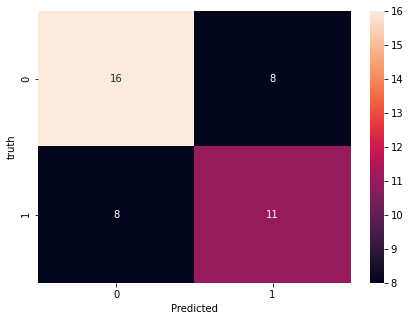

In [393]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (7,5))
sns.heatmap(cm_t0, annot = True)
plt.xlabel('Predicted')
plt.ylabel('truth')

In [394]:
y_predict_train = classifier.predict(X_train)


print(classification_report(y_train,y_predict_train))

              precision    recall  f1-score   support

           0       0.67      0.78      0.72       213
           1       0.64      0.51      0.57       166

    accuracy                           0.66       379
   macro avg       0.66      0.65      0.65       379
weighted avg       0.66      0.66      0.66       379



In [395]:
from sklearn.metrics import confusion_matrix
cm_t1 = confusion_matrix(y_train,y_predict_train)
cm_t1

array([[166,  47],
       [ 81,  85]], dtype=int64)

Text(42.0, 0.5, 'truth')

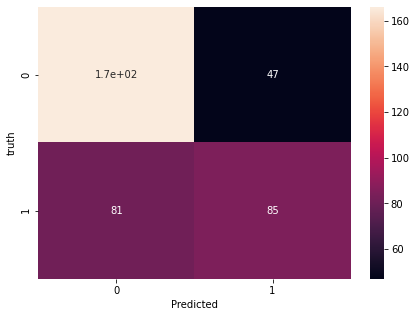

In [396]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (7,5))
sns.heatmap(cm_t1, annot = True)
plt.xlabel('Predicted')
plt.ylabel('truth')

In [1724]:
print("Accuracy on testing is" , classifier.score (X_test,y_test))
print("Accuracy on training is" , classifier.score (X_train,y_train))
      

Accuracy on testing is 0.3956043956043956
Accuracy on training is 0.7790055248618785


In [1796]:
df4 = pd.read_csv("Feature_vectors_500.csv")

In [1797]:
df4

,0,1,2,3,4,5,6,7,8,9,...,494,495,496,497,498,499,Image_number,Unnamed: 501,P_Class,groups
0,0.114051,0.081215,-0.012922,0.173431,0.094362,0.337511,0.003156,-0.096396,0.006460,-0.042314,...,-0.034973,-0.053106,-0.051745,-0.068019,0.009846,0.062401,0,NaN,200-300,1
1,0.334460,0.028941,-0.005370,0.063412,0.010057,0.056178,0.451571,0.069143,-0.062810,-0.184082,...,0.044646,-0.016784,-0.038116,-0.050740,-0.035439,0.073750,1,NaN,300-400,2
2,0.092345,-0.055839,0.084751,-0.006010,0.001963,0.035899,-0.335293,0.311902,-0.071782,0.003602,...,0.483801,-0.211404,0.123666,-0.036259,0.489135,0.001654,2,NaN,400-500,3
3,0.247106,-0.058781,0.010524,0.389914,0.028722,0.169286,0.375321,-0.510279,0.264658,0.036387,...,-0.218361,-0.058467,-0.448152,-0.231969,0.193656,0.189956,3,NaN,500-600,4
4,-8.247592,-6.843514,-1.662557,-5.403598,-0.071629,-2.785317,-4.287941,-1.956789,3.903751,3.405218,...,-1.619611,5.367669,3.380491,4.927113,2.666951,-5.132117,4,NaN,600-700,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
448,0.145918,0.175591,0.104447,0.055242,-0.039701,0.027458,-0.042608,-0.006404,-0.106171,-0.067893,...,0.009799,-0.582344,-0.041187,-0.037597,-0.091881,0.019487,448,NaN,300-400,2
449,-0.904160,0.378594,0.426688,-1.459180,0.077897,-2.163214,2.154489,1.098399,-0.245721,0.612775,...,0.722670,2.412742,-0.123719,0.463215,-0.608086,1.096670,449,NaN,400-500,3
450,-0.113288,0.002120,0.143402,-0.019687,0.009451,0.091327,-0.099697,0.374070,-0.241913,0.161191,...,0.126848,-0.298519,0.256379,-0.039874,0.050136,0.009720,450,NaN,300-400,2
451,-0.159712,0.201879,0.108663,-0.522584,-0.026341,0.094741,-0.001891,0.384620,-0.334026,0.250449,...,0.206954,-0.317239,0.307654,-0.125426,0.061554,0.031362,451,NaN,400-500,3


In [1798]:
df3 = df4.dropna( how = 'all',axis = 1 )

In [1799]:
df3


,0,1,2,3,4,5,6,7,8,9,...,493,494,495,496,497,498,499,Image_number,P_Class,groups
0,0.114051,0.081215,-0.012922,0.173431,0.094362,0.337511,0.003156,-0.096396,0.006460,-0.042314,...,-0.112135,-0.034973,-0.053106,-0.051745,-0.068019,0.009846,0.062401,0,200-300,1
1,0.334460,0.028941,-0.005370,0.063412,0.010057,0.056178,0.451571,0.069143,-0.062810,-0.184082,...,-0.083056,0.044646,-0.016784,-0.038116,-0.050740,-0.035439,0.073750,1,300-400,2
2,0.092345,-0.055839,0.084751,-0.006010,0.001963,0.035899,-0.335293,0.311902,-0.071782,0.003602,...,0.030237,0.483801,-0.211404,0.123666,-0.036259,0.489135,0.001654,2,400-500,3
3,0.247106,-0.058781,0.010524,0.389914,0.028722,0.169286,0.375321,-0.510279,0.264658,0.036387,...,-0.045167,-0.218361,-0.058467,-0.448152,-0.231969,0.193656,0.189956,3,500-600,4
4,-8.247592,-6.843514,-1.662557,-5.403598,-0.071629,-2.785317,-4.287941,-1.956789,3.903751,3.405218,...,7.101043,-1.619611,5.367669,3.380491,4.927113,2.666951,-5.132117,4,600-700,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
448,0.145918,0.175591,0.104447,0.055242,-0.039701,0.027458,-0.042608,-0.006404,-0.106171,-0.067893,...,-0.886551,0.009799,-0.582344,-0.041187,-0.037597,-0.091881,0.019487,448,300-400,2
449,-0.904160,0.378594,0.426688,-1.459180,0.077897,-2.163214,2.154489,1.098399,-0.245721,0.612775,...,-0.130892,0.722670,2.412742,-0.123719,0.463215,-0.608086,1.096670,449,400-500,3
450,-0.113288,0.002120,0.143402,-0.019687,0.009451,0.091327,-0.099697,0.374070,-0.241913,0.161191,...,0.011567,0.126848,-0.298519,0.256379,-0.039874,0.050136,0.009720,450,300-400,2
451,-0.159712,0.201879,0.108663,-0.522584,-0.026341,0.094741,-0.001891,0.384620,-0.334026,0.250449,...,0.000391,0.206954,-0.317239,0.307654,-0.125426,0.061554,0.031362,451,400-500,3


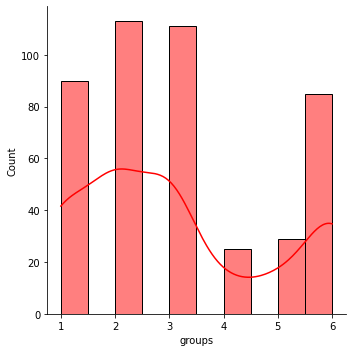

In [1801]:
df20 = pd.DataFrame(df3['groups'])
sns.displot(df20, x="groups",kde = 'True', color = 'r' )

In [1738]:
df3

,0,1,2,3,4,5,6,7,8,9,...,493,494,495,496,497,498,499,Image_number,P_Class,groups
0,0.114051,0.081215,-0.012922,0.173431,0.094362,0.337511,0.003156,-0.096396,0.006460,-0.042314,...,-0.112135,-0.034973,-0.053106,-0.051745,-0.068019,0.009846,0.062401,0,200-300,1
1,0.334460,0.028941,-0.005370,0.063412,0.010057,0.056178,0.451571,0.069143,-0.062810,-0.184082,...,-0.083056,0.044646,-0.016784,-0.038116,-0.050740,-0.035439,0.073750,1,300-400,2
2,0.092345,-0.055839,0.084751,-0.006010,0.001963,0.035899,-0.335293,0.311902,-0.071782,0.003602,...,0.030237,0.483801,-0.211404,0.123666,-0.036259,0.489135,0.001654,2,400-500,3
3,0.247106,-0.058781,0.010524,0.389914,0.028722,0.169286,0.375321,-0.510279,0.264658,0.036387,...,-0.045167,-0.218361,-0.058467,-0.448152,-0.231969,0.193656,0.189956,3,500-600,4
4,-8.247592,-6.843514,-1.662557,-5.403598,-0.071629,-2.785317,-4.287941,-1.956789,3.903751,3.405218,...,7.101043,-1.619611,5.367669,3.380491,4.927113,2.666951,-5.132117,4,600-700,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
448,0.145918,0.175591,0.104447,0.055242,-0.039701,0.027458,-0.042608,-0.006404,-0.106171,-0.067893,...,-0.886551,0.009799,-0.582344,-0.041187,-0.037597,-0.091881,0.019487,448,300-400,2
449,-0.904160,0.378594,0.426688,-1.459180,0.077897,-2.163214,2.154489,1.098399,-0.245721,0.612775,...,-0.130892,0.722670,2.412742,-0.123719,0.463215,-0.608086,1.096670,449,400-500,3
450,-0.113288,0.002120,0.143402,-0.019687,0.009451,0.091327,-0.099697,0.374070,-0.241913,0.161191,...,0.011567,0.126848,-0.298519,0.256379,-0.039874,0.050136,0.009720,450,300-400,2
451,-0.159712,0.201879,0.108663,-0.522584,-0.026341,0.094741,-0.001891,0.384620,-0.334026,0.250449,...,0.000391,0.206954,-0.317239,0.307654,-0.125426,0.061554,0.031362,451,400-500,3


In [1739]:
df3['groups'].value_counts()

2    113
3    111
1     90
6     85
5     29
4     25
Name: groups, dtype: int64

In [1740]:
y = df3['groups']

In [1741]:
X_5 = df3.drop(labels = ['P_Class','Image_number','groups'],  axis = 1)

In [1742]:
X = X_5.dropna( how = 'all',axis = 1 )

In [1802]:
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.2, random_state = 101)

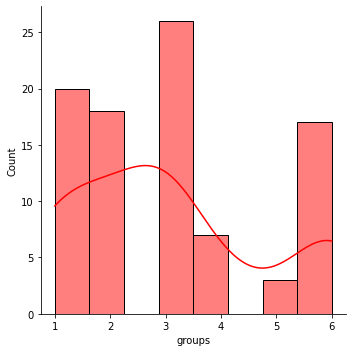

In [1805]:
df40 = pd.DataFrame(y_test)
sns.displot(df40, x="groups",kde = 'True', color = 'r' )

In [23]:
from sklearn import svm
classifier = svm.SVC(kernel = 'rbf', gamma = 'auto', C = 25)
classifier.fit(X_train,y_train)

y_predict = classifier.predict(X_test)

In [24]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_predict))



              precision    recall  f1-score   support

           1       0.20      0.18      0.19        11
           2       0.12      0.22      0.16         9
           3       0.12      0.08      0.10        12
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         1
           6       0.44      0.40      0.42        10

    accuracy                           0.20        46
   macro avg       0.15      0.15      0.15        46
weighted avg       0.20      0.20      0.19        46



In [25]:
from sklearn.metrics import confusion_matrix
cm_t2 = confusion_matrix(y_test,y_predict)
cm_t2

array([[2, 4, 3, 0, 0, 2],
       [3, 2, 3, 0, 0, 1],
       [3, 5, 1, 1, 0, 2],
       [0, 0, 1, 0, 2, 0],
       [0, 1, 0, 0, 0, 0],
       [2, 4, 0, 0, 0, 4]], dtype=int64)

Text(42.0, 0.5, 'truth')

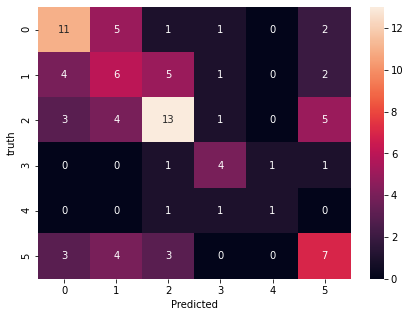

In [1748]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (7,5))
sns.heatmap(cm_t2, annot = True)
plt.xlabel('Predicted')
plt.ylabel('truth')

In [1753]:
y_predict_5 = classifier.predict(X_train)

print(classification_report(y_train,y_predict_5))


              precision    recall  f1-score   support

           1       0.92      0.93      0.92        70
           2       0.87      0.96      0.91        95
           3       0.85      0.85      0.85        85
           4       1.00      0.83      0.91        18
           5       0.82      0.88      0.85        26
           6       0.93      0.79      0.86        68

    accuracy                           0.88       362
   macro avg       0.90      0.87      0.88       362
weighted avg       0.89      0.88      0.88       362



In [1754]:
from sklearn.metrics import confusion_matrix
cm_t3 = confusion_matrix(y_train,y_predict_5)
cm_t3

array([[65,  0,  4,  0,  1,  0],
       [ 0, 91,  3,  0,  1,  0],
       [ 2,  5, 72,  0,  3,  3],
       [ 1,  1,  0, 15,  0,  1],
       [ 1,  2,  0,  0, 23,  0],
       [ 2,  6,  6,  0,  0, 54]], dtype=int64)

Text(42.0, 0.5, 'truth')

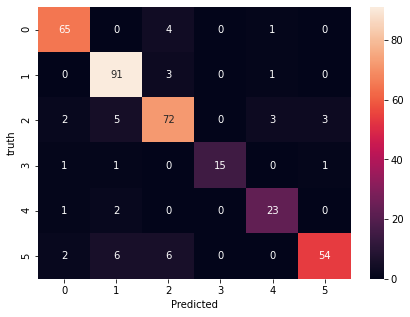

In [1755]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (7,5))
sns.heatmap(cm_t3, annot = True)
plt.xlabel('Predicted')
plt.ylabel('truth')

In [1756]:
print("Accuracy on testing is" , classifier.score (X_test,y_test))
print("Accuracy on training is" , classifier.score (X_train,y_train))

Accuracy on testing is 0.46153846153846156
Accuracy on training is 0.8839779005524862


In [1757]:
df5 = pd.read_csv("Feature_vectors_750.csv")

In [1758]:
df6 = df5.dropna( how = 'all',axis = 1 )

y = df6['groups']

In [1784]:
df6['groups'].value_counts()

2    113
3    111
1     90
6     85
5     29
4     25
Name: groups, dtype: int64

In [1786]:
df2 = pd.DataFrame(df6)

In [1789]:
df19 = pd.DataFrame(df2['groups'])

In [1791]:
df19

,groups
0,1
1,2
2,3
3,4
4,5
...,...
448,2
449,3
450,2
451,3


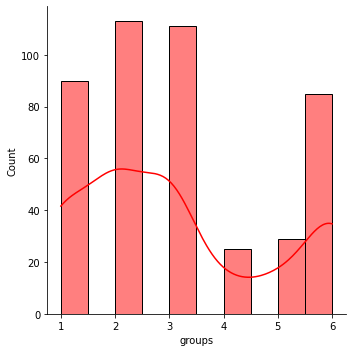

In [1795]:
sns.displot(df19, x="groups",kde = 'True', color = 'r' )

In [1760]:
X_7 = df6.drop(labels = ['P_Class','Image_number','groups'],  axis = 1)

In [1761]:
X = X_7.dropna( how = 'all',axis = 1 )

In [1762]:
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.2, random_state = 101)

In [1763]:
from sklearn import svm
classifier = svm.SVC(kernel = 'rbf', gamma = 'auto', C = 28)
classifier.fit(X_train,y_train)

y_predict = classifier.predict(X_test)

In [1765]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_predict))
print

              precision    recall  f1-score   support

           1       0.36      0.25      0.29        20
           2       0.14      0.28      0.19        18
           3       0.45      0.38      0.42        26
           4       0.67      0.29      0.40         7
           5       0.50      0.33      0.40         3
           6       0.43      0.35      0.39        17

    accuracy                           0.32        91
   macro avg       0.42      0.31      0.35        91
weighted avg       0.38      0.32      0.34        91



<function print>

In [1766]:
from sklearn.metrics import confusion_matrix
cm_t4 = confusion_matrix(y_test,y_predict)
cm_t4

array([[ 5, 10,  2,  0,  0,  3],
       [ 5,  5,  7,  1,  0,  0],
       [ 2,  9, 10,  0,  0,  5],
       [ 0,  4,  0,  2,  1,  0],
       [ 0,  1,  1,  0,  1,  0],
       [ 2,  7,  2,  0,  0,  6]], dtype=int64)

Text(42.0, 0.5, 'truth')

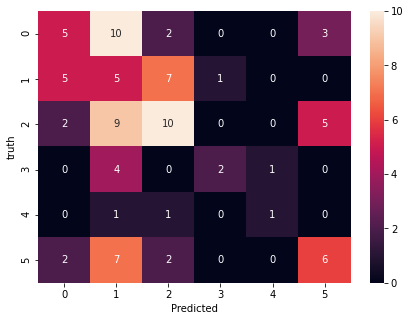

In [1767]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (7,5))
sns.heatmap(cm_t4, annot = True)
plt.xlabel('Predicted')
plt.ylabel('truth')

In [1768]:
y_predict_7 = classifier.predict(X_train)

print(classification_report(y_train,y_predict_7))


              precision    recall  f1-score   support

           1       0.93      0.89      0.91        70
           2       0.79      0.94      0.86        95
           3       0.78      0.85      0.81        85
           4       1.00      0.61      0.76        18
           5       0.91      0.81      0.86        26
           6       0.89      0.75      0.82        68

    accuracy                           0.85       362
   macro avg       0.89      0.81      0.84       362
weighted avg       0.85      0.85      0.84       362



In [1769]:
from sklearn.metrics import confusion_matrix
cm_t5 = confusion_matrix(y_train,y_predict_7)
cm_t5

array([[62,  1,  6,  0,  0,  1],
       [ 0, 89,  5,  0,  1,  0],
       [ 1,  6, 72,  0,  1,  5],
       [ 0,  5,  2, 11,  0,  0],
       [ 3,  1,  1,  0, 21,  0],
       [ 1, 10,  6,  0,  0, 51]], dtype=int64)

Text(42.0, 0.5, 'truth')

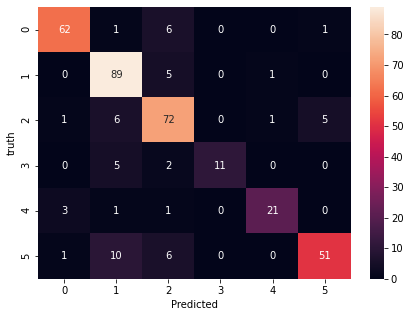

In [1770]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (7,5))
sns.heatmap(cm_t5, annot = True)
plt.xlabel('Predicted')
plt.ylabel('truth')

In [1626]:
print("Accuracy on testing is" , classifier.score (X_test,y_test))
print("Accuracy on training is" , classifier.score (X_train,y_train))

Accuracy on testing is 0.31868131868131866
Accuracy on training is 0.8453038674033149


In [1771]:
df9 = pd.read_csv("Feature_vectors_1000.csv")

In [1772]:
df10 = df9.dropna( how = 'all',axis = 1 )

y = df10['groups']

In [1773]:
X_8 = df10.drop(labels = ['P_Class','Image_number','groups'],  axis = 1)


In [1774]:
X = X_8.dropna( how = 'all',axis = 1 )

In [1775]:
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.2, random_state = 101)

In [1776]:
from sklearn import svm
classifier = svm.SVC(kernel = 'rbf', gamma = 'auto', C = 23)
classifier.fit(X_train,y_train)

y_predict = classifier.predict(X_test)

In [1777]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           1       0.54      0.35      0.42        20
           2       0.17      0.28      0.21        18
           3       0.38      0.42      0.40        26
           4       0.00      0.00      0.00         7
           5       0.40      0.67      0.50         3
           6       0.55      0.35      0.43        17

    accuracy                           0.34        91
   macro avg       0.34      0.35      0.33        91
weighted avg       0.38      0.34      0.35        91



In [1778]:
from sklearn.metrics import confusion_matrix
cm_t6 = confusion_matrix(y_test,y_predict)
cm_t6

array([[ 7,  8,  3,  1,  0,  1],
       [ 3,  5,  7,  2,  0,  1],
       [ 3,  9, 11,  0,  0,  3],
       [ 0,  2,  2,  0,  3,  0],
       [ 0,  0,  0,  1,  2,  0],
       [ 0,  5,  6,  0,  0,  6]], dtype=int64)

Text(42.0, 0.5, 'truth')

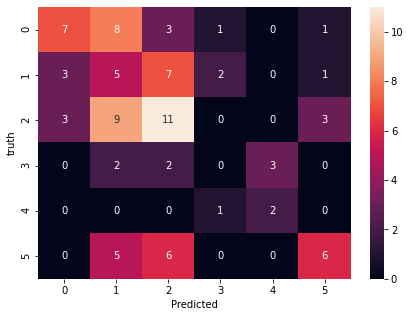

In [1779]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (7,5))
sns.heatmap(cm_t6, annot = True)
plt.xlabel('Predicted')
plt.ylabel('truth')

In [1780]:
y_predict_1 = classifier.predict(X_train)

print(classification_report(y_train,y_predict_1))


              precision    recall  f1-score   support

           1       0.79      0.83      0.81        70
           2       0.79      0.82      0.80        95
           3       0.72      0.86      0.78        85
           4       1.00      0.56      0.71        18
           5       0.86      0.73      0.79        26
           6       0.84      0.71      0.77        68

    accuracy                           0.79       362
   macro avg       0.84      0.75      0.78       362
weighted avg       0.80      0.79      0.79       362



In [1781]:
from sklearn.metrics import confusion_matrix
cm_t7 = confusion_matrix(y_train,y_predict_1)
cm_t7

array([[58,  3,  5,  0,  0,  4],
       [ 6, 78,  8,  0,  3,  0],
       [ 2,  5, 73,  0,  0,  5],
       [ 0,  3,  5, 10,  0,  0],
       [ 3,  2,  2,  0, 19,  0],
       [ 4,  8,  8,  0,  0, 48]], dtype=int64)

Text(42.0, 0.5, 'truth')

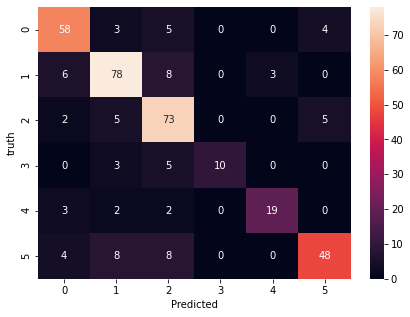

In [1782]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (7,5))
sns.heatmap(cm_t7, annot = True)
plt.xlabel('Predicted')
plt.ylabel('truth')

In [1783]:
print("Accuracy on testing is" , classifier.score (X_test,y_test))
print("Accuracy on training is" , classifier.score (X_train,y_train))

Accuracy on testing is 0.34065934065934067
Accuracy on training is 0.7900552486187845


In [1823]:
df_5665 = pd.DataFrame([1,2,3,4],[90,113,111,85],['Group',])
df_5665

,Group
90,1
113,2
111,3
85,4


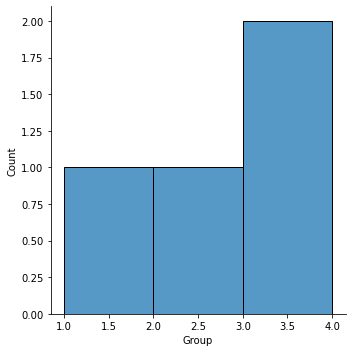

In [1821]:
sns.displot(df_5665,x= 'Group', y = )